### Table of Contents

## 6 <a >Classification Problem</a>
>6.1 <a href="#problem-description">Problem Description</a><br>
>6.2 <a href="#gathering-data">Gathering data</a><br>
>6.3 <a href="#train-classifier">Training the classifier</a><br>
>6.4 <a href="#performance-metrics">Performance metrics</a><br>
>> 6.4.1 <a href="#confusion">Confusion matrix</a><br>
>> 6.4.2<a href="#precision-recall"> precision and recall</a><br>
>> 6.4.3<a href="#prtrade"> precision and recall trade off</a><br>
>> 6.4.4 <a href="#roc">ROC curve</a><br>

>6.5 <a href="#multiclass">Multiclass classification</a><br>
>6.6 <a href="#multilabel">Multi Label classification</a><br>
>6.7 <a href="#multioutput">Multi output classification</a><br>

In the previous, we have looked at one kind of supervised learning problem called "regression". In this chapter, we will deal with another real-world example but this time it is a "classification" problem.

## <a id="problem-description" name="problem-description">6.1 Problem description</a>

Throughout this chapter, we are going to work with image data. This data doesn't contain any kind of tables or relations. It has only images of handwritten digits that are written by students and employees.

Each image is labeled with some digit. Our task is to make the model that identifies these hand written digits accurately.

Let's get started.

## <a id="gathering-data" name="gathering-data" >6.2 Gathering data</a>

The dataset that we are going to use is an MNIST dataset that contains 70,000 handwritten images of digits.

You can get this dataset from the sci-kit learn library itself. In this chapter especially, the data we are using is an image kind of one so the cells take a bit more time to run.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**`sklearn.datasets`** contain **`fetch_openml()`** that provides real-time datasets.

By default, the function returns labels as a Series and inputs as a Pandas DataFrame. Set **`as_frame=False`** for MNIST images to obtain NumPy arrays, which are more appropriate for image data.

In [2]:
#separating the features and the target variables(labels)
x,y = mnist.data,mnist.target

In [3]:
x.shape

(70000, 784)

You can see that there are 70,000 images of handwritten digits. And each image has 784 features. Each image is 28x28 pixels and each feature simply represents the intensity of color(could be black or white).

Ah!, we don't require all this stuff. Let's see one digit now.

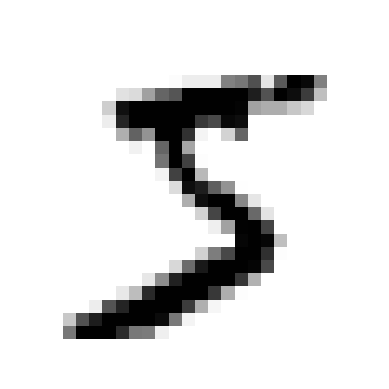

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] =100

# a user defined function
def showImage(image):
  image = image.reshape(28,28)
  plt.imshow(image,cmap='binary')
  plt.axis('off')

some_digit = x[0]
# calling user defined function
showImage(some_digit)
plt.show()

That's it. We have displayed the first digit of the dataset. For this, we used the **`imshow()`** method to display the image in "binary" format.

Created my function to display the image. From any other cell, I can ask this function to display the image.

Now let's split the data into train and test sets.

In [5]:
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

If the dataset is a data frame (means table) we would have displayed the first 10 rows or some portion of data.

But this dataset contains only images, let's try printing the first 100 images of the dataset.

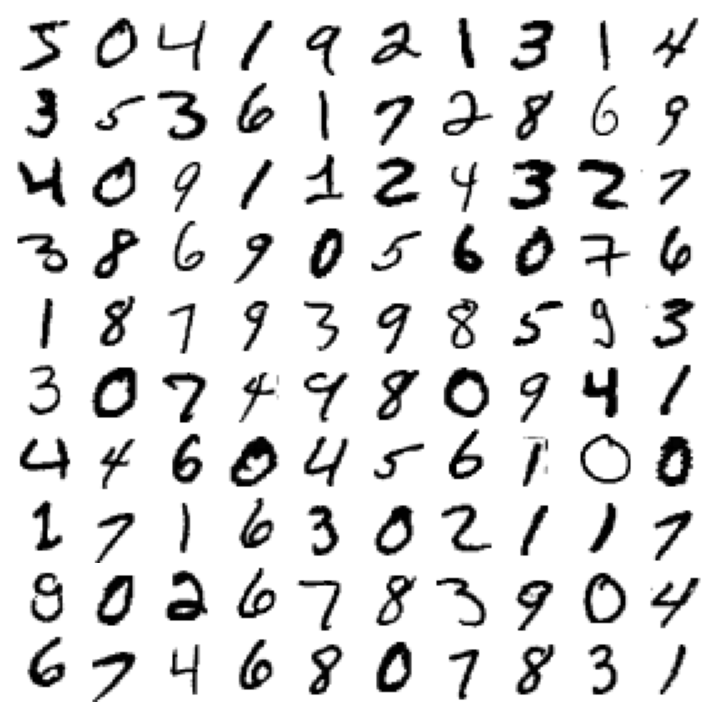

In [6]:
# code to plot the first 100 images of the mnist data set

plt.figure(figsize=(9,9))

#run for loop to get first 100 images from the dataset
for index,im_data in enumerate(x[:100]):
  plt.subplot(10,10,index+1)
  #sending image to the user defined method
  showImage(im_data)

plt.subplots_adjust(wspace=0,hspace=0)
plt.show()


At first, we have set each image height as 9x9. Then every image will be placed on the side of a grid. So, the size of the grid is set to 10x10 using **`plt.subplot(10,10,index+1)`** where the grid index is represented as index+1. Then we sent the image to the user function.

At last, we have separated the grid with **`wspace=0`** and **`hspace=0.`**

## <a id="train-classifier" name="train-classifier">6.3 Training the classifier</a>

Let's create a simple classifier that only identifies a particular digit. Let's consider 7. We'll create a separate set that holds only the images of 7.

This classifier will detect the 7 and has two classes- 7 and non-7.

In [7]:
y_train_5 = (y_train=='5')
y_test_5 = (y_test == '5')

print('collected data regarding 5...')

collected data regarding 5...


Now it's time to pick the model. Our dataset contains 70,000 images which means it is too large. So, we need a classifier that can handle large amounts of data.

Our first choice will be the "**Stochastic Gradient Descent**" classifier (SGD classifier). It can handle large amounts of data very efficiently and it will train the instances independently.

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

There you go. We have trained our classifier. Let's predict whether the value that we have taken first and displayed in its image is 5 or not.

In [9]:
sgd_classifier.predict([some_digit])

#got to first cell for the value we have taken. Since some_digit=x[0]=5

array([ True])

The classifier has predicted that some_digit holds 5. Let's evaluate the model's performance.

## <a id="performance-metrics" name="performance-metrics">6.4 Performance metrics</a>

Evaluating a classifier is more hectic than a regressor. So, we'll see some of the strategies that are used most to evaluate a classifier.

Let's check the accuracy of the model using the cross-validation technique. So, the sole purpose of the classifier is to split the training set into *k*-folds and then evaluate it *k*-times.

In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Bravo! The accuracy is above 95%. That was tremendous. It is very good to go with the classifier. It has correctly classified the positive(7-class) data.

We'll also check for a dummy classifier, which will classify the images into non-7 classes. This dummy classifier will classify the images into the most frequent class.

In [11]:
#using dummy classifier

from sklearn.dummy import DummyClassifier

d_cls = DummyClassifier()
d_cls.fit(x_train,y_train_5)
print(any(d_cls.predict(x_train)))

False


Let's predict the model's accuracy.

In [12]:
cross_val_score(d_cls,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

For the dummy classifier, you got 89% of accuracy. Since we have only given 10% of images to the model, it could classify whether the image is 5 or not.

But to be frank, "accuracy" is not the best strategy to evaluate the performance of the model. This is where we always select "Confusion matrix".

You can also cross validate your model with out using **`cross_val_score()`**.
With the help of StratifiedKFolds you can write a user defined function to evaluate the model.

I don't wanna make this context more difficult by writing the code.

### 6.4.1 <a id="confusion" name="confusion">**Confusion Matrix**</a>

The main idea behind the confusion matrix is to count how many times the instances of class A are classified as class B. For example, consider the images of 5. The confusion matrix lets you know the number of times the image 5 is classified as class-1.

To compute the confusion matrix, we need to have a set of predictions. So that, the predicted values are compared with the actual target values. But now we can't try with *y_test*.

We'll touch this set at the end. But for now, we'll look into a new method called **`cross_val_predict`**.

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier,x_train,y_train_5,cv=3)

**`cross_val_predict`** works similar to the **`cross_val_score()`**. But it returns the predictions instead of evaluations. It also uses k-folds to train k-times.

Let's compute the confusion matrix.

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

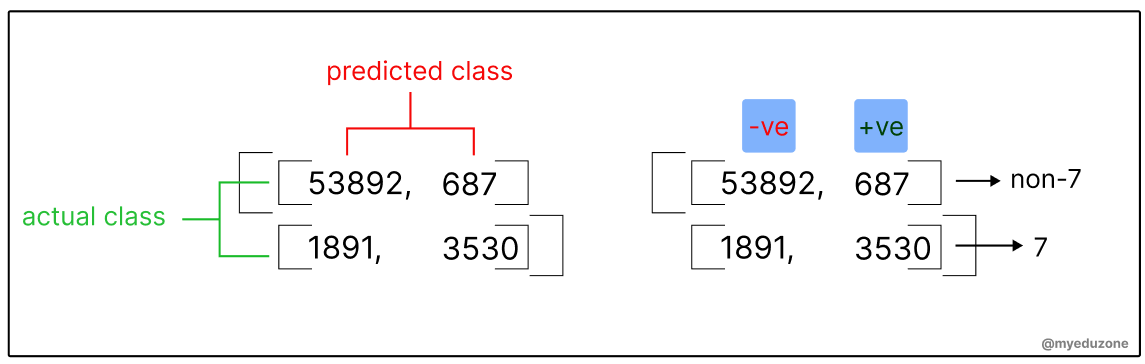

Based on the output, the confusion matrix is given a 2-D array where the rows depict the actual classes and the columns represent the predicted classes.

The first row shows the non-5 images and the second row shows the 5-class images. We can draw from the confusion matrix that, 53,892 images are perfectly classified as non-5 images and these are called '**true negatives**'.

And 687 images are classified falsely as 5 images. These are called '**false positives**'. In the 2nd row, it falsely classified 1,891 images as 5-class which is why is it called '**false negative**'. And 3,530 images are truely classified as 5-class which means they are '**true positives**'.

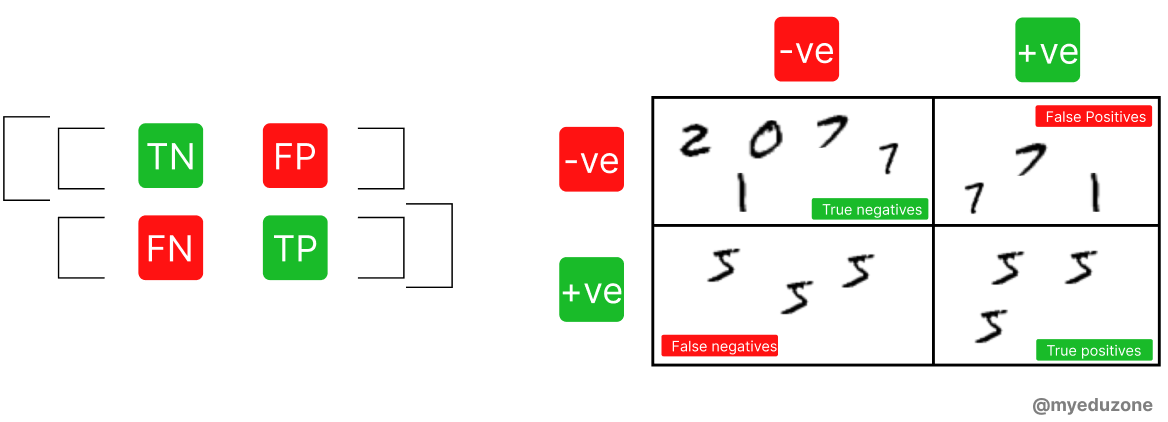

A perfect classifier only has True negatives and True positives. Assume that you have got perfect model. Then the confusion has 0 as a diagonal element. Let's make it clear.

In [15]:
y_train_predictions_perfect = y_train_5  # assume you got the perfect model

confusion_matrix(y_train_5,y_train_predictions_perfect)

array([[54579,     0],
       [    0,  5421]])

Like the above confusion matrix you need to get your values that is only true negative and true positives.

Let's go more precise with "precision" which tells you how accurately a model classified positives.

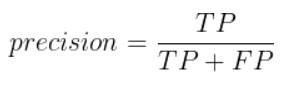

In just a single sentence precision is all about telling that x instance belongs to class A. This tells 100% precision. If it classified 1 instance as class-A accurately it is like having 100%. But things won't go well if we use only precision as a metric, so we have another metric that can be used with precision. This is called **recall**.

Recall is all about the ratio of a number of True positives to the sum of several true positives and several false negatives.

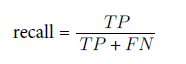

### 6.4.2 <a id="precision-recall" name="precision-recall">**Precision and recall**</a>

Now we'll check the precision and recall. To do so we have already predefined functions. **`sklearn.metrics`** provides **`precision_score()`** and **`recall_score()`** to check the precision and recall.

In [16]:
from sklearn.metrics import precision_score,recall_score

print(f'precision: {precision_score(y_train_5,y_train_pred)}')
print(f'recall: {recall_score(y_train_5,y_train_pred)}')

precision: 0.8370879772350012
recall: 0.6511713705958311


What can we conclude from those scores?

The precision is telling that when it needs to classify an image as 5 it is correct only for 83.7%. But it is detecting the images as class 5 for 65%.

The thing we have to go deeper is that by combining both precision and recall. This combination we call it as ***F1 score***. F1 score is the harmonic mean of precision and recall.

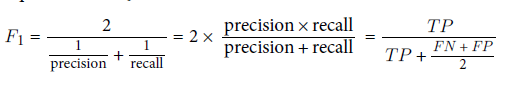

Let's find out thr F1 score.

In [17]:
from sklearn.metrics import f1_score

print(f'f1 score: {f1_score(y_train_5,y_train_pred)}')


f1 score: 0.7325171197343846


That's the f1 score we have so far only for the 5-detector not for all images.

Sometimes, we need to depend only on one metric whether it is precision or recall. Precision focuses on accurately classifying the x instance into true positives whereas we have recall which emphasizes detecting all the instances.

Sometimes, we need high recall rather than precision. So, the job is to reduce one metric and increase another metric. This is what we call "**precision-recall tradeoff**".

###6.4.3 <a id="prtrade" name="prtrade">**Precision and recall tradeoff**</a>

Before going into what this precision and recall tradeoff is, we need to know how the SGDClassifier works.

SGDClassifier will provide a score for each instance of the image using the *decision function*. Then this score of the instance is compared with the threshold value. If the score of the instance is greater than the threshold then it is classified as positive but if the score of the instance is less then the instance is classified as negative.

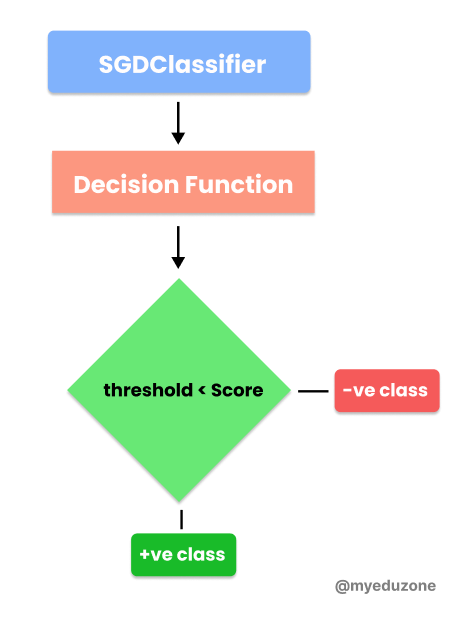

But how do we know this threshold value?

Sci-kit learns will not allow you to seek directly into the threshold value. But we can make use of **`decision_function()`** instead of **`predict()`**. **`decision_function()`** returns the score of the instance.

Then we'll choose any threshold value to make predictions.

In [18]:
y_scores = sgd_classifier.decision_function([some_digit]) #getting the score the image using decision_function
y_scores

array([2164.22030239])

The score of the image is 2,164.22. Now we'll set a threshold value and then we'll see how it works.

In [19]:
threshold = 0

y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

The score of the image is 2,164 and the threshold value given is 0. On comparing them we see the score of some_digit is greater than the threshold so it is classified into a positive class.

In [20]:
threshold = 3000
y_some_digit_pred = y_scores>threshold
y_some_digit_pred

array([False])

The above code tells you that when the threshold is increased then the recall gets decreased. The image we stored in some_digit is 5 only but the classifier tells it is not due to an increase in the threshold value.

We need to choose the threshold for our classifier. In order to choose the threshold value first we'll get the scores of all the instances using **`cross_val_predict`**.

We know that **`cross_val_predict()
`** will give predictions. But instead of predictions we'll ask for scores using **`decision_function`**.

In [21]:
y_scores = cross_val_predict(sgd_classifier,x_train,y_train_5,cv=3,method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

Let's look for threshold value using a plot called **precision-recall curve**.

**`precision_recall_curve()`** will compute precision and recall for every threshold. Let's compute those values now.

In [22]:
from sklearn.metrics import precision_recall_curve

precisions,recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

We have computed various precisions and recalls through various thresholds.

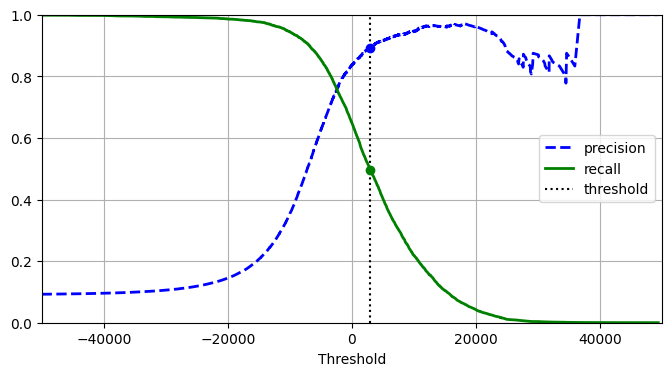

In [23]:
plt.figure(figsize=(8,4))
plt.plot(thresholds,precisions[:-1],'b--',label='precision',linewidth=2)
plt.plot(thresholds,recalls[:-1],'g-',label='recall',linewidth=2)
plt.vlines(threshold,0,1.0,'k','dotted',label='threshold')

index = (thresholds>=threshold).argmax()
plt.plot(thresholds[index],precisions[index],'bo')
plt.plot(thresholds[index],recalls[index],'go')
plt.axis([-50000,50000,0,1])
plt.grid()
plt.legend(loc='center right')
plt.xlabel('Threshold')
plt.show()

**`plt.plot(thresholds,precisions[:-1],'b--',label='precision',linewidth=2)plt.plot(thresholds,recalls[:-1],'g-',label='recall',linewidth=2)`** these lines of code will plot the lines on the graph. One is dashed and the other ones line with no breaks.

You can see that the recall is decreased when it finds the greater threshold value. And the precision has increased but sometimes the precision also goes off. That is why you see those bumps there in the plot.

Not only this we can also plot the graph between precision and recall.

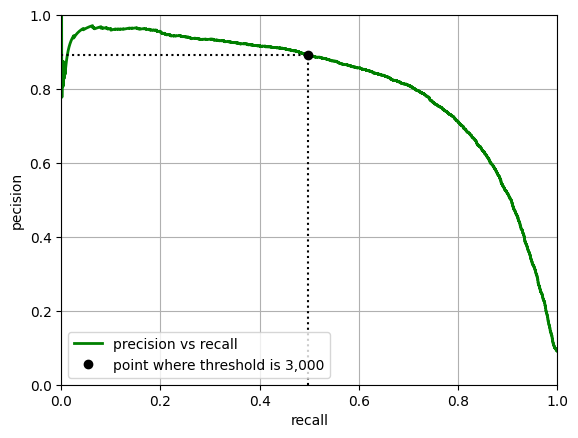

In [24]:
plt.plot(recalls,precisions,'g',linewidth=2,label='precision vs recall')
plt.plot([recalls[index], recalls[index]], [0., precisions[index]], "k:")
plt.plot([0.0, recalls[index]], [precisions[index], precisions[index]], "k:")
plt.plot([recalls[index]],[precisions[index]],"ko",label='point where threshold is 3,000')
plt.legend(loc='lower left')
plt.xlabel('recall')
plt.ylabel('pecision')
plt.axis([0,1,0,1])
plt.grid()
plt.show()

We have plotted a graph for precision Vs recall. The point on the curve in the threshold whose value is 3,000.

In this graph, you can observe that the recall starts to fall from the threshold point and the precision is increased.

I know there are a few methods and strategies that are introduced at instant while writing the code. This is where we learn things by doing projects and real-world examples. Remember those methods and you can refer particular library documentation for more information.

You can see from the plot that the precision starts dropping nearly after 80%. So we need to choose precision/recall just before the drop.

Around 50% or 60% (look at the plot for insights).

Let's aim for 90% precision. We need to get a threshold value where we find 90% precision. For that, we need to get the index values of precisions >= 90%.

In [25]:
index_for_90_precision = (precisions>=0.90).argmax()
threshold_for_90_precision = thresholds[index_for_90_precision]
threshold_for_90_precision

3370.0194991439557

We got the threshold value of 3,370. Now based on this threshold value we'll make predictions without using **`the predict()`** method.

In [26]:
y_train_90_pred = (y_scores>threshold_for_90_precision)
print('predicted the y_train set with 90% precision...')

predicted the y_train set with 90% precision...


So, now we have the predictions. Let's check the precision and recall score.

In [27]:
precision_score(y_train_5,y_train_90_pred)

0.9

In [28]:
recall_score(y_train_5,y_train_90_pred)

0.47980077476480354

Great! we got the predictions at 90% precision at 47% recall. The precision is very fine. We are saying that the instance belongs to class A at a rate of 90% precision. But we have less recall. Always need to have a good recall so that it can predict a maximum number of '5' instances.

So far, we have made the classifier to achieve only 90% precision but not the recall.

###6.4.4 <a id="roc" name="roc">**ROC Curve**</a>

ROC is another important tool for the binary classifiers which is similar to the Precision/recall curve. But the thing is we won't plot a graph between precision and recall. Instead, we plot a graph between recall which in a term called *true positive rate*, and the *false positive rate.*

Here we got another name for recall, TPR and FPR is nothing but how many times the negative instance is classified as positive.

So, we'll plot the graph between TPR and FNR. We can go with precision/recall trade but it is good to know other tools also.

In [29]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_train_5,y_scores)

Let's plot the graph between TPR and FPR.

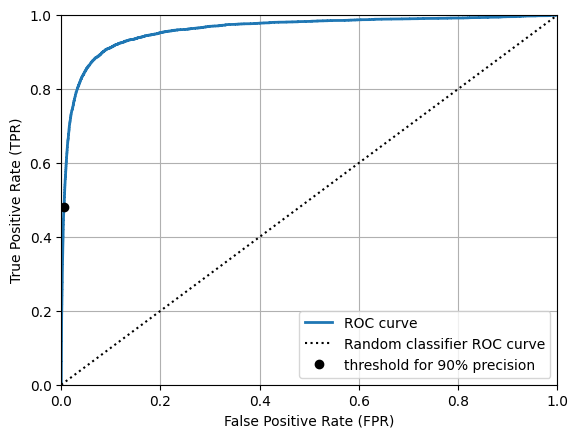

In [30]:
index_at_90_threshold = (thresholds<=threshold_for_90_precision).argmax()
tpr_90,fpr_90 = tpr[index_at_90_threshold],fpr[index_at_90_threshold]

plt.plot(fpr,tpr,linewidth=2,label='ROC curve')
plt.plot([0,1],[0,1],'k:',label='Random classifier ROC curve')
plt.plot(fpr_90,tpr_90,'ko',label='threshold for 90% precision')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

From the graph, you can see the trade-off. The higher the recall (more TPR) the more will be the FPR. And the dotted line represents the ROC curve of the purely random classifier.

So, far we have tested our dataset on only one classifier which is SGDClassifier. If in the future, if we consider another classifier how could we compare them?

We can compare the classifiers using **Area Under the Curve (AUC)**. Always remember that a perfect classifier will always have a ROC AUC equal to 1.

Let's check this.

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9604938554008616

They are very close. Let's try another classifier instead of SGDClassifier.

In [32]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

We have chosen **`RandomForestClassifier`** as another binary classifier model.

Now our job is to check ROC and AUC for RandomForest also. For that, we need to have scores for each instance. But RandomForest can't return scores for each instance.

Instead, we can get the probabilities for each instance by passing **`method='predict_prob'`** in the **`cross_val_predict()`** method.

In [33]:
y_prob_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method='predict_proba')
y_prob_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

So, **`predict_proba`** will return the probabilities of the class for each instance.

From the above code, we can conclude that the first image is classified as a positive class with 89% probability and the 2nd image as negative with 99% probability.

And you can see that the probabilities in each row are added up to 100%.

In the array, the 2nd column represents the estimated probabilities. We'll treat them as instances scores.

In [34]:
y_scores_forest = y_prob_forest[:,1]

precisions_forest,recalls_forest,thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)

now let's plot the graph precision/recall for the random forest also.

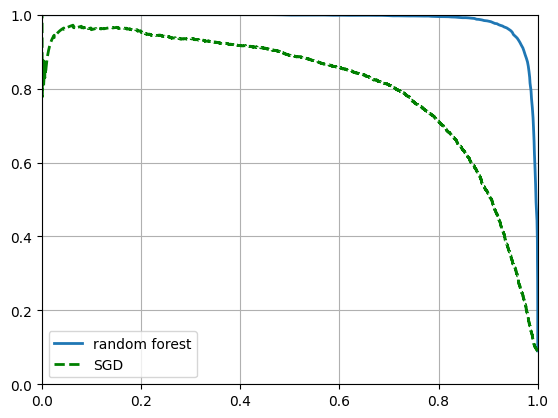

In [35]:
plt.plot(recalls_forest,precisions_forest,label='random forest',linewidth=2)
plt.plot(recalls,precisions,'g--',label='SGD',linewidth=2)
plt.legend(loc='lower left')
plt.grid()
plt.axis([0,1,0,1])
plt.show()

As you can see the PR curve of the random forest is greater than the SGD. And let's check the precision and recall of random forests.

In [36]:
y_pred_forest = y_prob_forest[:,1]>=0.5
precision_score(y_train_5,y_pred_forest)

0.9897468089558485

In [37]:
recall_score(y_train_5,y_pred_forest)

0.8725327430363402

Well, the precision and recall of random forests are quite better than SGD. Also, the PR curve of the random forest is greater than the SGD.

Let's check the f1 score of the random forest.

In [38]:
f1_score(y_train_5,y_pred_forest)

0.9274509803921569

Wow! RandomForestClassifier has done a very nice job so far. It is good to go.

## <a id="multiclass" name ="multiclass">6.5 Multiclass Classification</a>

So far, we have classified only two classes, as they belong to either 5 or non-5. Let's work on creating multiclass classification which has more than 2 classes.

Other than **`SGDClassifier`** and **`SVC`** classifier we have **`RandomForestClassifier`**, **`LogisticRegression`** classifier, etc that can handle multiclass classification. Using some binary classifiers also we can create multiclass classifications.

This section maximum consists of theory which is made short. Don't skip this as it is important to know how to do things.

In the last paragraph it is mentioned that with the help of multiple binary classifiers like **`SGDClassifier`**, we can create a multiclass classifier. But in general, preparing a multiclass classifier using multiple binary classifiers is a hectic strategy. This is where we opt for **`LogisticeRegression`** and other algorithms.

So, we have 10 digits, and using multiple binary classifier strategy we can create 10 classes (1-detector, 2-detector, etc.). And we can train the classifiers such that they classify the images based on the scores.
This strategy is called **One-versus-Rest (OvR)**.

In this strategy, we are trying to classify the image by comparing the decision score of each classifier.


Another strategy is **`One-versus-One(OvO)`**. Here we train the classifier in such a way that the binary classifier is well-prepared for every pair of digits like distinguishing 0s and 1s, 0s and 2s, and so on.

When you follow this strategy and if you got N classifiers then you need to train the image with Nx(N-1)/2 classifiers. Like we have 10 images or classes. Then we need to train a single image with 10x(10-1)/2 = 45 classifiers.

When this OvO is compared with OvR, OvO is faster. Also, algorithms like SVM when dealing with multiclass classification scales poorly. For this kind of algorithm, we prefer the OvO strategy.

Let's try the SVM classifier. To note that, Sci-Kit learn will automatically perform OvO or OvR when you try to perform multiclass classification using a binary classifier.

Let's train SVM classifier with only 2000 images.




In [39]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(x_train[:2000],y_train[:2000])

SVC(random_state=42)

Using **`SVC`** from **`sklearn.svm`** we have trained only 2000 images of our classifier. Let's predict **`some_digit`**.

In [40]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

Bravo! It has predicted the correct output. Let's check what is the score of image 5 for every other class it made.

We can do this by calling the **`decision_function()`**.

In [41]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

As you can see class 5 has 9.3 as a decision score. And our image is classified into that class.

Let's check to which class does 9.3 score really belongs to using **`argmax()`** method.

In [42]:
class_id = some_digit_scores.argmax()
class_id

5

Yes, we said it right. It has correctly classified into the right class. Let's see what are the classes this classifier made using **`classes_`**.

In [44]:
print(f'classes: {svm_clf.classes_}')
print(f'class ID of 5 is {svm_clf.classes_[class_id]}')

classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
class ID of 5 is 5


Our sci-kit learn has automatically done the OvO or OvR. But what if you have the classifier to forcibly perform OvO or Ovr?

We can do this using the following code. Let's make svm use OvR strategy.

In [45]:
from sklearn.multiclass import OneVsRestClassifier

#using OvR strategy for SVM
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train[:2000],y_train[:2000])



OneVsRestClassifier(estimator=SVC(random_state=42))

In [46]:
#prediction
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

Using sklearn.multiclass we get OneVsRestClassifier that will allow us to perfom OvR.

Now let's try training **`SGDClassifier`** over multiclass classification.

In [47]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train)

#this cell takes 3-4 mins to get executed since it is training against 70,000 images.

SGDClassifier(random_state=42)

In [48]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

That is not correct right? Since we know the image is '5' it is classified as '3'. This model is not sure about its prediction. Sci-kit Learn used the OvR strategy by default.

Let's check the model score using **`cross_val_score()`**.

In [50]:
cross_val_score(sgd_classifier,x_train,y_train,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

The score is 85%. Let's try to scale the features and then we'll once again check the score.

In [54]:
#performing scaling of x_trian data

from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype('float64'))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring='accuracy')

#this cell nearly takes 13-14 mins to run. The only reason is that 70,000 images are scaled and then validated.

array([0.8983, 0.891 , 0.9018])

Now the score of the model has been increased after scaling. Now it is 89%. We performed scaling using **`StandardScaler`** from **`sklearn.preprocessing.`**

For instance, let's say you have chosen the model and now it's time for us to analyze the model. The only way that we can do with the classification model is by some visualizations.

Let's analyze our model using the confusion matrix only this time with some visualizations. Yes, you heard it right, we are using a different strategy to analyze our model with the help of a confusion matrix.

The only things that confusion matrix wants are predictions and labels.Let's find predictions with the help of **`cross_val_predict()`**

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)

#this cell takes 15mins to run

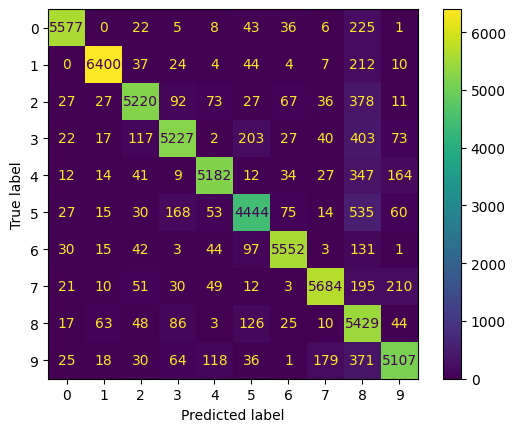

In [57]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

That's the beauty of the **`ConfusionMatrixDisplay`**(). We can tell from the plot itself like, 9 is classified as 0 25 times. All the elements in the diagonal are correctly classified into their classes.

But you could see the 5-image class that its diagonal value has gone dark. This could be due to fewer images of 5 in the dataset. So it is always preferred to normalize the data. We have already come across this in our previous chapter.

Let's normalize the plot.

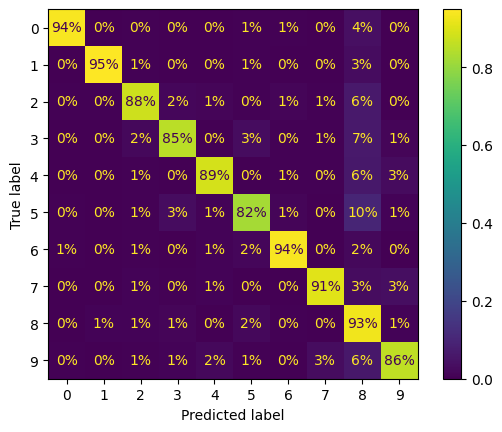

In [59]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',values_format='.0%')
plt.show()

This plot is the normalized version of the previous plot. Instead, we asked it to print the values in % format. That is using **`values_format=".0%'`** we have displayed the values in % format.

From the plot, we can conclude that 82% of images are correctly classified as 5s. And 10% of 5s are classified as 8.

You can say that from the plot the most of the images are classified as 8.

Let's try checking how much percent of images are classified as 8. Check the below code for this

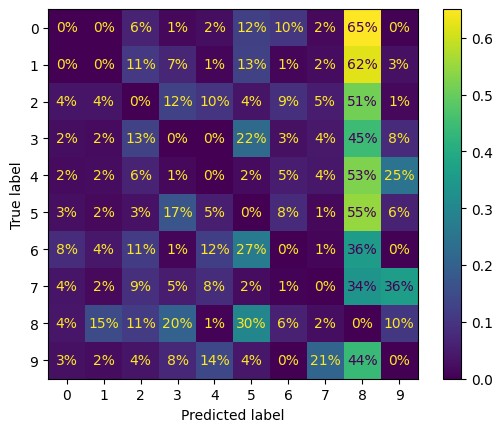

In [61]:
sample_weight = (y_train_pred!=y_train)

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',sample_weight = sample_weight,values_format='.0%')
plt.show()

From the above plot, we can conclude that 65% of 0s are wrongly classified as 8, and 54% of 2s are classified as 8. These are the errors made by the classifier.

Using **`sample_weight`** we have displayed the plot. So far we have normalized the things by rows and let's normalize the same plot to columns.

Let's play with the code and we'll make the plots organized. There is nothing new. We'll just keep the previous plots organized that's it.

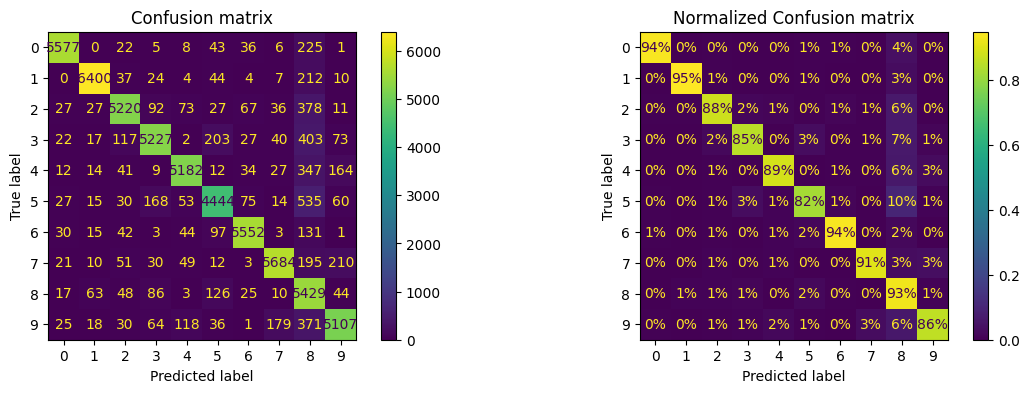

In [68]:
# plotting the confusion matrix side by side.
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(14,4))
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,ax=axs[0])
axs[0].set_title('Confusion matrix')
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,ax=axs[1],normalize='true',values_format='.0%')
axs[1].set_title('Normalized Confusion matrix')
plt.show()

Nothing just we have display the first two plots side by side to keep them organized.

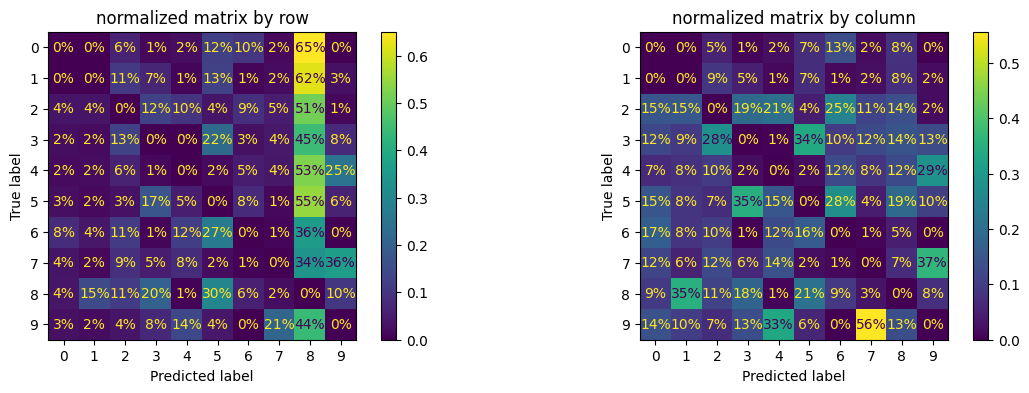

In [72]:
# plotting confusion matrix which is normalized by row and column
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(14,4))
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',ax=axs[0],sample_weight=sample_weight,values_format='.0%')
axs[0].set_title('normalized matrix by row')
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='pred',ax=axs[1],sample_weight=sample_weight,values_format='.0%')
axs[1].set_title('normalized matrix by column')
plt.show()

We got the plot that is on the left but the plot to the right is a new one. The matrix is normalized to a column instead of a row. To do so instead of passing 'true' to normalize we need to pass 'pred'.

From the right side plot, we can see that 56% of 9s are misclassified as 7.

We can conclude a lot of things from the plot itself. More images are getting classified as 8s. We need to avoid this.

We can only avoid this by data augmentation (adding more images of 8). We can make use of some more libraries to do so. But as and now we are not doing any data augmentation.

## <a id="multilabel" name="multilabel">Multilabel Classification</a>

So far we have assigned only one class to each instance (image). What if we want to assign multiple classes in every instance?

For example, consider the vehicle recognition system mostly cars. A camera can detect multiple cars in one picture. For like say you have to detect MG Hector, Hyundai, and Tata Indica harrier. The camera captured only MG Hector and Hyundai, and then it returned [True, True, False] as a label.

This kind of classification assigns multiple tags for each instance is called **multilabel classification.**

Let's code to give multiple tags for each instance.

In [74]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>='7')
y_train_odd = (y_train.astype('int8')%2==1)
y_multilabel = np.c_[y_train_large,y_train_odd] # this will concatenate two arrays long 2nd axis(column)
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier()

From the above code, we have created two labels: "***y_train_large***" which tells whether the instance is greater than 7 or not and the other one is **`y_train_odd`** which tells whether the instance is odd or not.

And this time we opted for **`KNeighorsClassifier`** which is another classifier. Don't worry about using these algorithms. We'll discuss them in detail in coming lectures.

In [75]:
knn_clf.predict([some_digit])

array([[False,  True]])

The above prediction did not return any label of the class instead it returned two tags. One is False and the other one is True.

We know that some_digit=5, which is why 5 is not a large number compared to 7 so the first one is False. And 5 is odd so the other one is True.

Let's check the score of this module. I prefer choosing the f1 score metric. We can also use other metrics too. Let's check with what is our f1 score.

In [79]:
y_train_pred_knn = cross_val_predict(knn_clf,x_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_pred_knn, average='macro')

0.976410265560605

That's fine. Now, to get noted classifiers like SVM will not support multilabel classification. If we want them to do so then we need to train one model per label. This is a hard time and consumes more time than you expected.

Instead, we can solve this issue using the "chain" concept. That means we organize the models in chains so that the predictions of one model will become the inputs to another model.

Let's perform the ChainClassification also.

In [80]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(),cv=3, random_state=42)
chain_clf.fit(x_train[:2000],y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [81]:
chain_clf.predict([some_digit])

array([[0., 1.]])

There you go. There is nothing new in the output. But instead of True and False, we got 0 and 1.

Using the above code we have tried the SVM classifier to predict the multilabel values. However, the fact is that SVM does not support multilabel classification. Then comes the Chain classifier that allows us to perform multilabel with SVC.

## <a id="multioutput" name="multioutput">6.6 Multioutput classification</a>

**Multioutput** classification represents an advanced paradigm in machine learning, transcending traditional multilabel tasks. In a dynamic example, an image denoising system is introduced, transforming noisy digit images into clean counterparts. Despite resembling regression, the task is cast as a multioutput classification. This approach, treating each pixel as a distinct label, showcases the system's ability to predict pixel intensities across a spectrum, providing a nuanced understanding of complex, real-world applications and the versatility of multioutput systems beyond standard classification scenarios.

Let's create the above-given example where we add noise to images and then generate the clear pixeled images.

In [86]:
np.random.seed(42)
noise = np.random.randint(0,100,(len(x_train),784))
x_train_no = x_train+noise
noise = np.random.randint(0,100,(len(x_test),784))
x_test_no = x_test+noise

y_train_no = x_train
y_test_no = x_test

now let's plot the results.

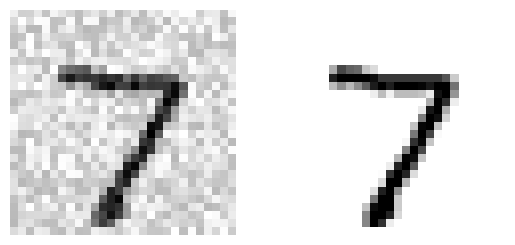

In [88]:
plt.subplot(121); showImage(x_test_no[0])
plt.subplot(122); showImage(y_test_no[0])

plt.show()

You can see the image on the left is a noisy one and the image on the right is pure.

Now let's try to use KNN to clean the right image a bit more.

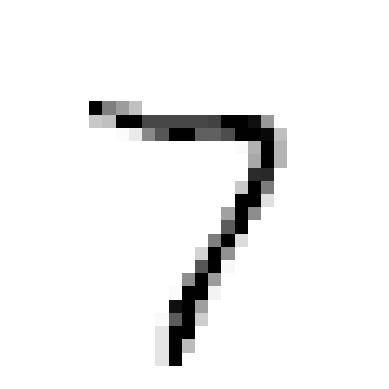

In [90]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_no,y_train_no)
clean_digit = knn_clf.predict([x_test_no[0]])
showImage(clean_digit)
plt.show()

Finally its done. Throughout this whole chapter we have learned what is classification. Till now we have only worked with supervised learning algorithm.

We have solved two real world examples of it using some algorithms. But we didn't know how they work. We'll be learning the working of these algorithms in coming lectures.

This ends the chapter of classification. You have came across lot of different methods/functions and algorithms that are not taught in the previous chapters.

That is why we have to do projects. By doing projects you'll know some more functions and algorithms that are not used by us.

## Summary

This chapter deals with the classification problem of supervised learning.

- The problem is described at the outset, and the significance of gathering data is emphasized.

- The procedure entails training the classifier and assessing its effectiveness with a range of metrics.

- The confusion matrix, precision and recall, precision and recall trade-off, and ROC curve are some of the performance metrics that were covered.

- The chapter addresses scenarios involving multiple classes and dives into multiclass classification.

- Using instances with multiple class labels, it delves deeper into the field of multi-label classification.

- The understanding of predicting multiple outputs per instance is extended with the introduction of the concept of multi-output classification.
